In [76]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from DRAMController import DRAMController
import PyLTSpice as spice
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
DRAMTestController = DRAMController()

In [79]:
new_address = 18*[1]
DRAMTestController.address = new_address

In [80]:
DRAMTestController.deselect()
print(DRAMTestController)

Deselected


In [83]:
DRAMTestController.activate(bank=[1, 0, 1, 0], address=18*[1])
print(DRAMTestController)

Activate - Bank = [1. 0. 1. 0.], Address = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [36]:
df_AND_false = pd.read_csv("top_level_and_false.txt", delimiter="\t").head(350)

In [18]:
df_AND_false

,time,V(bit0),V(bit1),V(bit2),V(bit3),V(bitline0),V(bitline1)
0,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
1,2.246094e-15,1.143741,0.571794,1.143741,8.836343e-13,0.495599,0.495536
2,3.218914e-15,1.347276,0.673544,1.347276,1.273355e-12,0.580963,0.582884
3,5.164553e-15,1.347183,0.673488,1.347183,2.041515e-12,0.583859,0.590659
4,9.055833e-15,1.347174,0.673482,1.347174,3.507084e-12,0.607503,0.619507
...,...,...,...,...,...,...,...
295,5.890287e-08,1.317788,1.317788,0.077432,7.743177e-02,1.328480,0.060012
296,5.912748e-08,1.318862,1.318862,0.075784,7.578447e-02,1.329143,0.058757
297,5.935209e-08,1.319894,1.319894,0.074179,7.417905e-02,1.329781,0.057534
298,5.957670e-08,1.320887,1.320887,0.072615,7.261452e-02,1.330394,0.056343


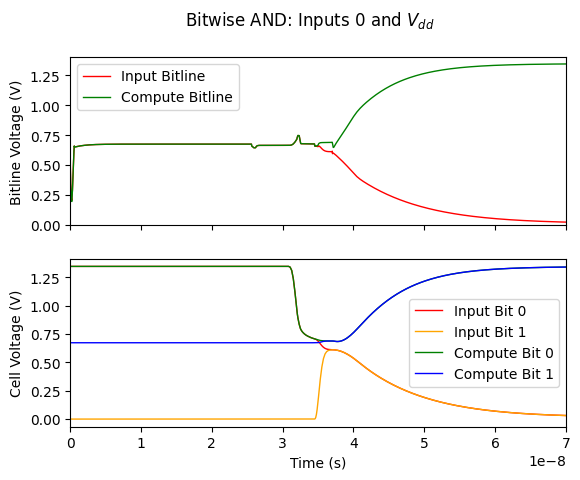

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True)
fig.suptitle("Bitwise AND: Inputs 0 and $V_{dd}$")


ax[1].set_xlabel("Time (s)")
ax[0].set_ylabel("Voltage (V)")
    
ax[0].plot(df_AND_false["time"], df_AND_false["V(bitline1)"], linewidth=1, color='red', label="Input Bitline")    
ax[0].plot(df_AND_false["time"], df_AND_false["V(bitline0)"], linewidth=1, color='green', label="Compute Bitline")

ax[0].set_ylabel("Bitline Voltage (V)")
ax[1].set_ylabel("Cell Voltage (V)")


ax[1].plot(df_AND_false["time"], df_AND_false["V(bit2)"], linewidth=1, color='red', label="Input Bit 0")
ax[1].plot(df_AND_false["time"], df_AND_false["V(bit3)"], linewidth=1, color='orange', label="Input Bit 1")
ax[1].plot(df_AND_false["time"], df_AND_false["V(bit0)"], linewidth=1, color='green', label="Compute Bit 0")
ax[1].plot(df_AND_false["time"], df_AND_false["V(bit1)"], linewidth=1, color='blue', label="Compute Bit 1")
# ax[i].plot(df[f"Time_{colnames[i]}"], df[f"Ampl_{colnames[i]}"], linewidth=0.5, color='orange')
# ax[i].plot(time_rising[i], df.loc[index_derivative_max[i], f'Derivative_{colnames[i]}'].values[0], 'ro')
# ax[i].plot(time_falling[i], df.loc[index_derivative_min[i], f'Derivative_{colnames[i]}'].values[0], 'ro')

# diff_rising = time_rising[1]-time_rising[0]
# diff_falling = time_falling[1]-time_falling[0]
ax[0].set_ylim(0, 1.4)
ax[0].set_xlim(0, 7e-8)

ax[0].legend()
ax[1].legend()
plt.show()
plt.close()


In [63]:
df_AND_true = pd.read_csv("top_level_and_true.txt", delimiter="\t").head(350)

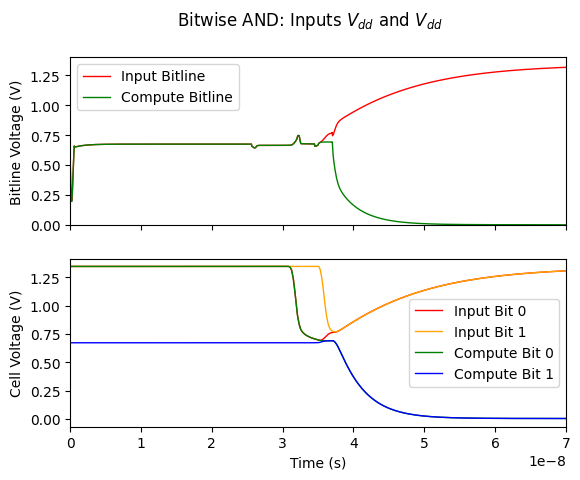

In [65]:
fig, ax = plt.subplots(2, 1, sharex=True)
fig.suptitle("Bitwise AND: Inputs $V_{dd}$ and $V_{dd}$")


ax[1].set_xlabel("Time (s)")
ax[0].set_ylabel("Voltage (V)")
    
ax[0].plot(df_AND_true["time"], df_AND_true["V(bitline1)"], linewidth=1, color='red', label="Input Bitline")    
ax[0].plot(df_AND_true["time"], df_AND_true["V(bitline0)"], linewidth=1, color='green', label="Compute Bitline")

ax[0].set_ylabel("Bitline Voltage (V)")
ax[1].set_ylabel("Cell Voltage (V)")


ax[1].plot(df_AND_true["time"], df_AND_true["V(bit2)"], linewidth=1, color='red', label="Input Bit 0")
ax[1].plot(df_AND_true["time"], df_AND_true["V(bit3)"], linewidth=1, color='orange', label="Input Bit 1")
ax[1].plot(df_AND_true["time"], df_AND_true["V(bit0)"], linewidth=1, color='green', label="Compute Bit 0")
ax[1].plot(df_AND_true["time"], df_AND_true["V(bit1)"], linewidth=1, color='blue', label="Compute Bit 1")
# ax[i].plot(df[f"Time_{colnames[i]}"], df[f"Ampl_{colnames[i]}"], linewidth=0.5, color='orange')
# ax[i].plot(time_rising[i], df.loc[index_derivative_max[i], f'Derivative_{colnames[i]}'].values[0], 'ro')
# ax[i].plot(time_falling[i], df.loc[index_derivative_min[i], f'Derivative_{colnames[i]}'].values[0], 'ro')

# diff_rising = time_rising[1]-time_rising[0]
# diff_falling = time_falling[1]-time_falling[0]
ax[0].set_ylim(0, 1.4)
ax[0].set_xlim(0, 7e-8)

ax[0].legend()
ax[1].legend()
plt.show()
plt.close()